# Recurrent Neural Network for Time Series Forecasting 
- This example is based on Univariate Dataset

In [140]:
# usual imports #
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
# ignore the unwanted warnings #
import warnings
warnings.filterwarnings(action='ignore')

In [142]:
# consistent plot size #
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [143]:
# import the dataset #
sales = pd.read_csv('../Data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)

In [144]:
sales.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [145]:
sales.dropna(inplace=True)

In [146]:
len(sales)

325

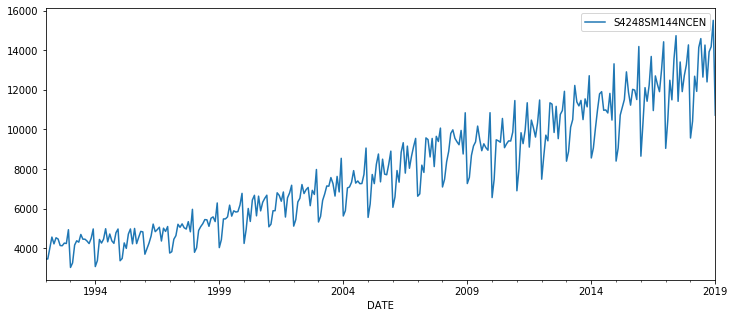

In [147]:
sales.plot(legend=True);

In [148]:
sales.columns = ['alcosales']

In [149]:
sales.head()

,alcosales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [151]:
decompose = seasonal_decompose(sales['alcosales'],model='additive')

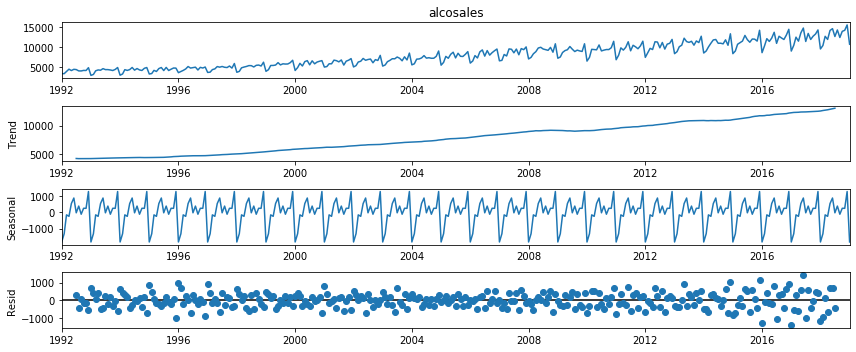

In [152]:
decompose.plot();

In [153]:
# split the data into train and test set #
train = sales.iloc[:313]
test = sales.iloc[313:]

In [154]:
len(test)

12

In [155]:
len(train)

313

In [160]:
# Scale the data before feeding into the neural network #
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler = MinMaxScaler()

In [162]:
scaler.fit(train)

MinMaxScaler()

In [166]:
scaled_train = scaler.transform(train)

In [167]:
scaled_train.shape

(313, 1)

In [165]:
scaled_test = scaler.transform(test)

In [111]:
# time series generator #
from keras.preprocessing.sequence import TimeseriesGenerator

In [112]:
n_input = 12   # the number of forecast 
n_features = 1 
batch_size = 1

In [113]:
generator = TimeseriesGenerator(data=scaled_train,targets=scaled_train,length=n_input,
                               batch_size=batch_size)

In [170]:
generator[0]

(array([[[-1.5316005 ],
         [-1.53196284],
         [-1.33485438],
         [-1.13122395],
         [-1.25550373],
         [-1.14390556],
         [-1.16673246],
         [-1.2859396 ],
         [-1.28992525],
         [-1.24173513],
         [-1.24861943],
         [-0.99643655]]]), array([[-1.68667848]]))

In [197]:
X,y = generator[0]

In [198]:
X.shape

(1, 12, 1)

In [199]:
X.flatten()

array([-1.5316005 , -1.53196284, -1.33485438, -1.13122395, -1.25550373,
       -1.14390556, -1.16673246, -1.2859396 , -1.28992525, -1.24173513,
       -1.24861943, -0.99643655])

In [200]:
X.shape

(1, 12, 1)

In [201]:
y.flatten()

array([-1.68667848])

In [202]:
y.shape

(1, 1)

In [118]:
# create the model #
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [119]:
model = Sequential()

model.add(LSTM(units=100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))

In [120]:
model.compile(optimizer='adam',loss='mse')

In [121]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [122]:
# fit the model #
model.fit_generator(generator,epochs=30)

Epoch 1/30
301/301 [==============================] - 2s 8ms/step - loss: 0.2078
Epoch 2/30
301/301 [==============================] - 2s 7ms/step - loss: 0.1535
Epoch 3/30
301/301 [==============================] - 2s 7ms/step - loss: 0.1287
Epoch 4/30
301/301 [==============================] - 2s 7ms/step - loss: 0.1215
Epoch 5/30
301/301 [==============================] - 2s 7ms/step - loss: 0.0935
Epoch 6/30
301/301 [==============================] - 2s 7ms/step - loss: 0.0800
Epoch 7/30
301/301 [==============================] - 2s 7ms/step - loss: 0.0606
Epoch 8/30
301/301 [==============================] - 2s 7ms/step - loss: 0.0610
Epoch 9/30
301/301 [==============================] - 2s 7ms/step - loss: 0.0396
Epoch 10/30
301/301 [==============================] - 2s 7ms/step - loss: 0.0333
Epoch 11/30
301/301 [==============================] - 2s 7ms/step - loss: 0.0313
Epoch 12/30
301/301 [==============================] - 2s 7ms/step - loss: 0.0297
Epoch 13/30
301/301 [====

In [123]:
loss = model.history.history['loss']

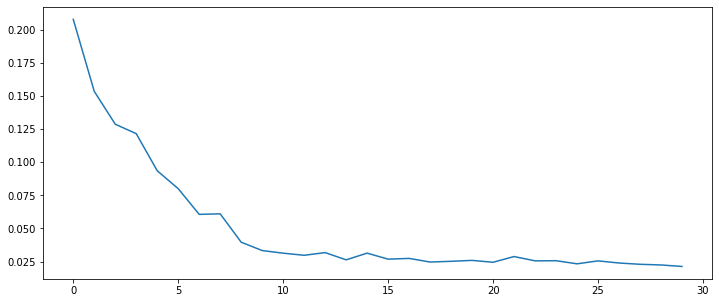

In [124]:
plt.plot(loss)

In [171]:
# evaluate on the test data #
first_eval_batch = scaled_train[-n_input:]

In [172]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [218]:
first_eval_batch = first_eval_batch.reshape(1,n_input,n_features)

In [219]:
first_eval_batch.shape

(1, 12, 1)

In [220]:
model.predict(first_eval_batch)[0]

array([0.6826618], dtype=float32)

In [176]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

In [214]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1,n_input,n_features)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) 
    

In [215]:
test_predictions

[array([0.6826618], dtype=float32),
 array([0.8055392], dtype=float32),
 array([0.75636697], dtype=float32),
 array([0.93086], dtype=float32),
 array([1.0050352], dtype=float32),
 array([0.75431055], dtype=float32),
 array([0.89461565], dtype=float32),
 array([0.77653533], dtype=float32),
 array([0.84639853], dtype=float32),
 array([0.90303713], dtype=float32),
 array([0.9658543], dtype=float32),
 array([0.59120476], dtype=float32)]

In [216]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

## Inverse Transformation and Comparison

In [184]:
true_predictions = scaler.inverse_transform(test_predictions)

In [188]:
test

,alcosales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [189]:
test['predictions'] = true_predictions

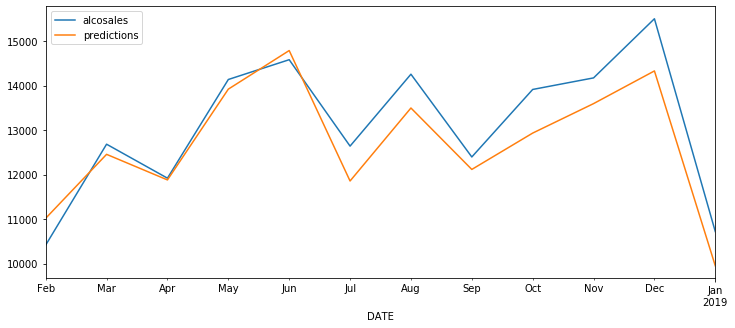

In [190]:
test.plot()

In [191]:
model.save('alcohol_sales.h5')

In [193]:
from keras.models import load_model

In [195]:
new_model = load_model('alcohol_sales.h5')

In [196]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
